<a href="https://colab.research.google.com/github/hyunsoojin/colab/blob/main/9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

189


In [5]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [7]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [8]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


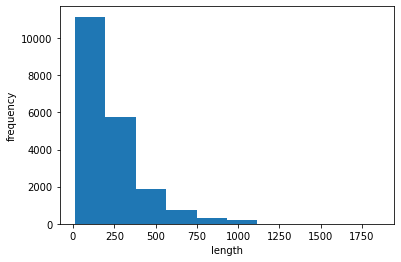

In [9]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [11]:
print(train_seq.shape)

(20000, 100)


In [12]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [13]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [14]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [15]:
val_seq = pad_sequences(val_input, maxlen=100)

In [16]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
train_oh = keras.utils.to_categorical(train_seq)

In [18]:
print(train_oh.shape)

(20000, 100, 500)


In [19]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [20]:
print(np.sum(train_oh[0][0]))

1.0


In [21]:
val_oh = keras.utils.to_categorical(val_seq)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 27s 74ms/step - loss: 0.6997 - accuracy: 0.5027 - val_loss: 0.6946 - val_accuracy: 0.5050
Epoch 2/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6935 - accuracy: 0.5145 - val_loss: 0.6928 - val_accuracy: 0.5078
Epoch 3/100
313/313 [==============================] - 23s 75ms/step - loss: 0.6913 - accuracy: 0.5247 - val_loss: 0.6913 - val_accuracy: 0.5126
Epoch 4/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6890 - accuracy: 0.5344 - val_loss: 0.6884 - val_accuracy: 0.5282
Epoch 5/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6813 - accuracy: 0.5698 - val_loss: 0.6755 - val_accuracy: 0.5904
Epoch 6/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6646 - accuracy: 0.6137 - val_loss: 0.6590 - val_accuracy: 0.6222
Epoch 7/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6449 - accuracy: 0.6520 - val_loss: 0.6373 - val_ac

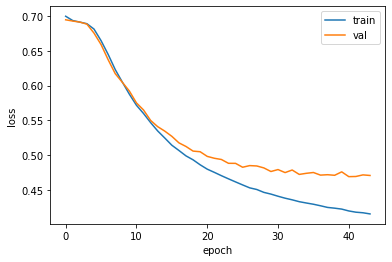

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [25]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [26]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 27s 83ms/step - loss: 0.6934 - accuracy: 0.5089 - val_loss: 0.6919 - val_accuracy: 0.5278
Epoch 2/100
313/313 [==============================] - 25s 81ms/step - loss: 0.6906 - accuracy: 0.5296 - val_loss: 0.6904 - val_accuracy: 0.5348
Epoch 3/100
313/313 [==============================] - 25s 80ms/step - loss: 0.6846 - accuracy: 0.5656 - val_loss: 0.6810 - val_accuracy: 0.5922
Epoch 4/100
313/313 [==============================] - 26s 84ms/step - loss: 0.6696 - accuracy: 0.6393 - val_loss: 0.6669 - val_accuracy: 0.6482
Epoch 5/100
313/313 [==============================] - 26s 84ms/step - loss: 0.6534 - accuracy: 0.6849 - val_loss: 0.6522 - val_accuracy: 0.6828
Epoch 6/100
313/313 [==============================] - 26s 84ms/step - loss: 0.6361 - accuracy: 0.7137 - val_loss: 0.6361 - val_accuracy: 0.7024
Epoch 7/100
313/313 [==============================] - 27s 85ms/step - loss: 0.6177 - accuracy: 0.7332 - val_loss: 0.6201 - val_ac

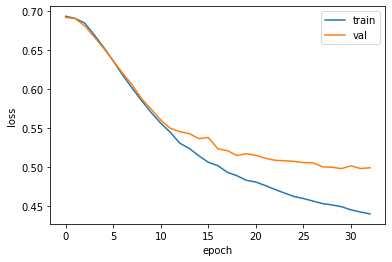

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()